In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/persian-fake-corona-news/CoronaALL.csv',sep='\t')
df.head()

,Unnamed: 0,Text,Class
0,0,من غیر منخرشه انا وهنادی بمکان فیه کرونا وهم ی...,2.0
1,1,تا خواستم کار رو شروع کنم و برم خرید کرونا اوم...,1.0
2,2,ایران تغییر رژیم با ویروس کرونا آندریوف کو...,0.0
3,3,هههههههههههه یلوناس خلو کرونا یروح بعدین نتفاهم,2.0
4,4,موج ضد آخوند توی تشییع جنازه های کرونا زده شکل...,0.0


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df[df["Class"]!=2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 1 to 12860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    8808 non-null   object 
 1   Class   8805 non-null   float64
dtypes: float64(1), object(1)
memory usage: 206.4+ KB


In [4]:
df = df.dropna()
df.describe()

,Class
count,8805.000000
mean,0.446110
std,0.497116
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


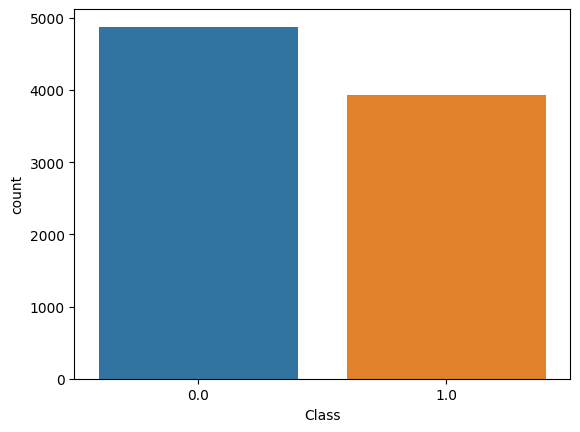

In [5]:
sns.countplot(data = df, x = df['Class']);

In [6]:
df['Class_Names']=df['Class'].map({0:'Posetive',1:'Negetive'})

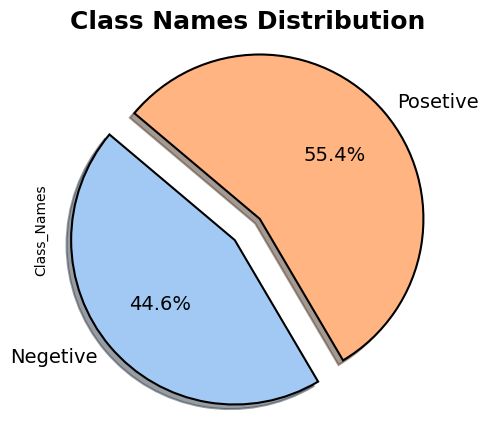

In [7]:
plt.figure(figsize=(5, 5))
palette_color = sns.color_palette('pastel')
explode = [0.1 for _ in range(df['Class_Names'].nunique())]

target_counts = df.groupby('Class_Names')['Class_Names'].count()

target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} 
)

plt.title('Class Names Distribution', fontsize=18, weight='bold')
plt.axis('equal')
plt.show()

# Data preparation

In [8]:
max_fatures = 1500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X,maxlen=150)

y=df['Class']

# Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7044, 150)
(1761, 150)
(7044,)
(1761,)


# ML Model

In [10]:
models = {
    'TREE': DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'GradBoost': GradientBoostingClassifier(),
    'CATBoost': CatBoostClassifier(),
    'XGBCL': XGBClassifier(),
    'LGBMCL': LGBMClassifier()
}

result = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    result[name]={
        'Accuracy':accuracy
    }
    
result_df = pd.DataFrame(result).T    

Learning rate set to 0.023711
0:	learn: 0.6920269	total: 62.7ms	remaining: 1m 2s
1:	learn: 0.6910260	total: 70.5ms	remaining: 35.2s
2:	learn: 0.6898607	total: 78.4ms	remaining: 26.1s
3:	learn: 0.6887317	total: 86.4ms	remaining: 21.5s
4:	learn: 0.6878160	total: 94.3ms	remaining: 18.8s
5:	learn: 0.6868431	total: 102ms	remaining: 16.9s
6:	learn: 0.6858842	total: 110ms	remaining: 15.6s
7:	learn: 0.6850427	total: 118ms	remaining: 14.6s
8:	learn: 0.6842499	total: 125ms	remaining: 13.8s
9:	learn: 0.6832143	total: 133ms	remaining: 13.2s
10:	learn: 0.6822320	total: 141ms	remaining: 12.7s
11:	learn: 0.6811609	total: 149ms	remaining: 12.3s
12:	learn: 0.6803441	total: 158ms	remaining: 12s
13:	learn: 0.6796010	total: 165ms	remaining: 11.6s
14:	learn: 0.6787316	total: 173ms	remaining: 11.4s
15:	learn: 0.6780230	total: 181ms	remaining: 11.1s
16:	learn: 0.6769755	total: 189ms	remaining: 10.9s
17:	learn: 0.6760208	total: 199ms	remaining: 10.8s
18:	learn: 0.6751635	total: 206ms	remaining: 10.6s
19:	lear

In [11]:
result_df

,Accuracy
TREE,0.795003
RF,0.819989
SVM,0.631459
AdaBoost,0.576377
GradBoost,0.649631
CATBoost,0.774560
XGBCL,0.821124
LGBMCL,0.794435


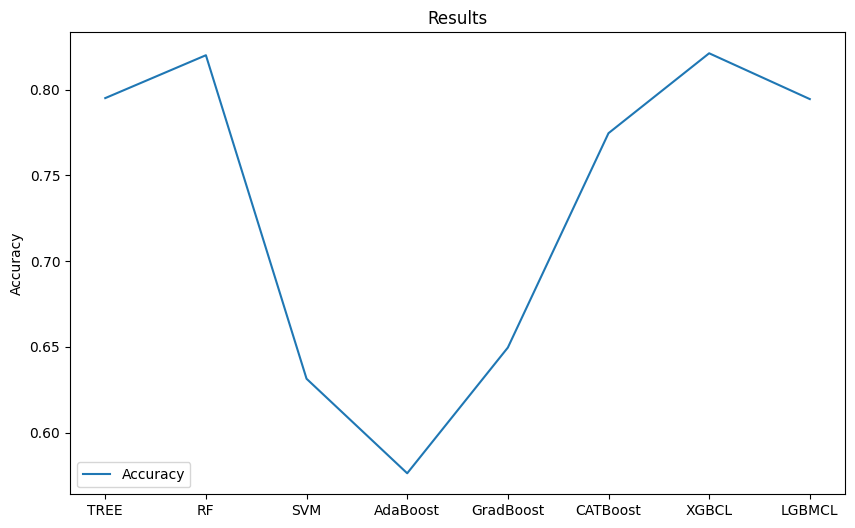

In [12]:
plt.figure(figsize=(10,6))

plt.title("Results")

sns.lineplot(result_df)

plt.ylabel("Accuracy");

# Credit:

https://www.kaggle.com/code/omidsakaki1370/fake-news-ml-models